In [1]:
# Importing Librarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt

import warnings
warnings.filterwarnings('ignore')

## Advanced Fearture Engineering

### Functional Tramsform:

##### Log Transform

##### Reciprocal Transform

##### Square x**2

###### Square root 

In [2]:
import scipy.stats as stats  ## QQ Plot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df=df[['Survived','Age','Fare']]

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [13]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

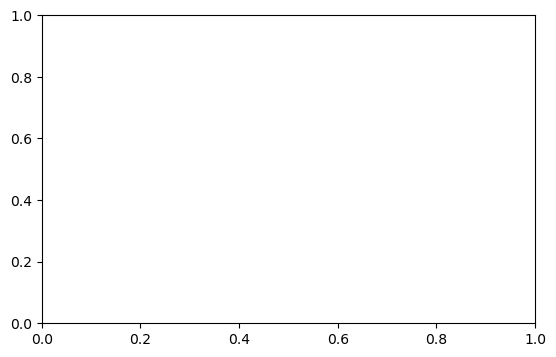

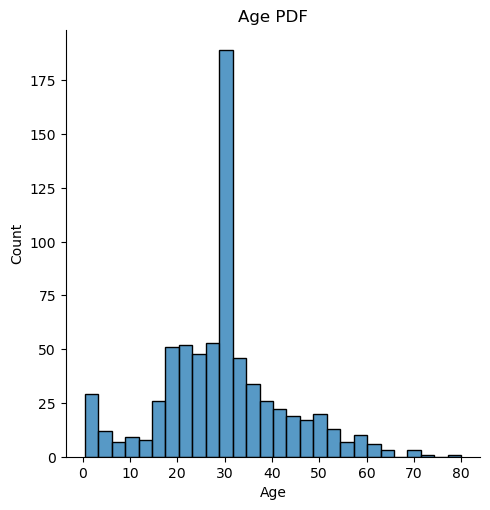

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Age'])
plt.title('Age PDF')



plt.show()

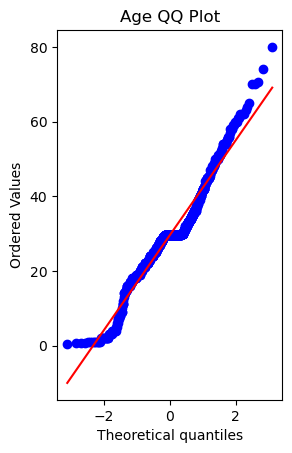

In [21]:
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

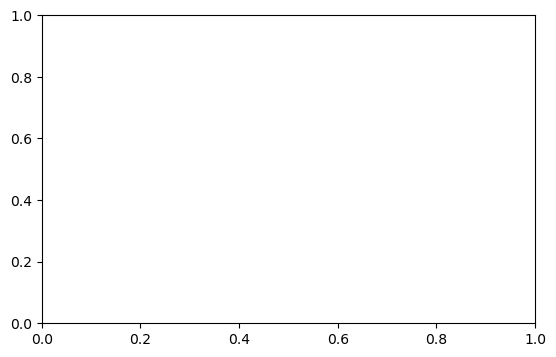

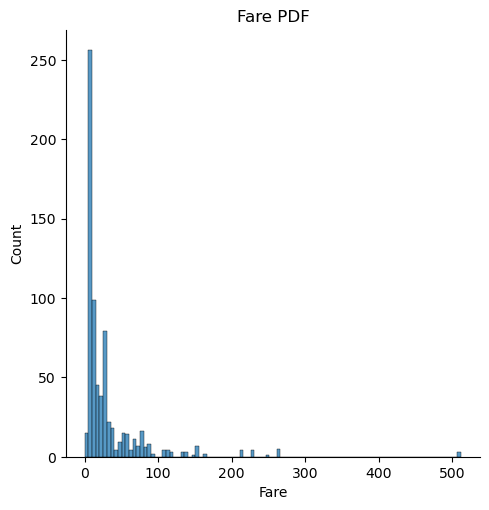

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(X_train['Fare'])
plt.title('Fare PDF')



plt.show()

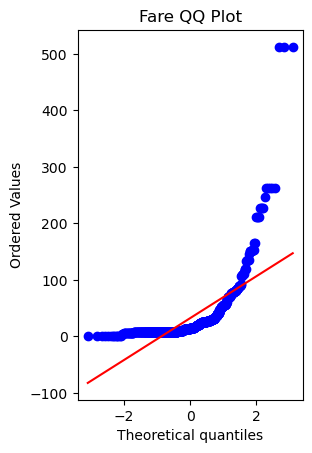

In [23]:
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [26]:
log = LogisticRegression()
dt = DecisionTreeClassifier()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred= log.predict(X_test)
y_pred1 = dt.predict(X_test)

In [39]:
print("Accuracy LOG", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LOG 0.6480446927374302
Accuracy DT 0.6871508379888268


In [41]:
trans = FunctionTransformer(func=np.log1p)

In [42]:
X_train_trans = trans.fit_transform(X_train)
X_test_trans = trans.fit_transform(X_test)

In [43]:
dt.fit(X_train_trans,y_train)

DecisionTreeClassifier()

In [44]:
log.fit(X_train_trans,y_train)

LogisticRegression()

In [49]:
y_pred_tr=log.predict(X_test_trans)
y_pred_tr1= dt.predict(X_test_trans)

In [50]:
print("Accuracy LOG", accuracy_score(y_test,y_pred_tr))
print("Accuracy DT", accuracy_score(y_test,y_pred_tr1))

Accuracy LOG 0.6815642458100558
Accuracy DT 0.6759776536312849


In [51]:
X_transformed = trans.fit_transform(X)

In [52]:
print(" LOG",np.mean(cross_val_score(log,X_transformed,y,scoring='accuracy', cv=10)))
print(" DT", np.mean(cross_val_score(dt,X_transformed,y,scoring='accuracy', cv=10)))

 LOG 0.678027465667915
 DT 0.6622347066167291


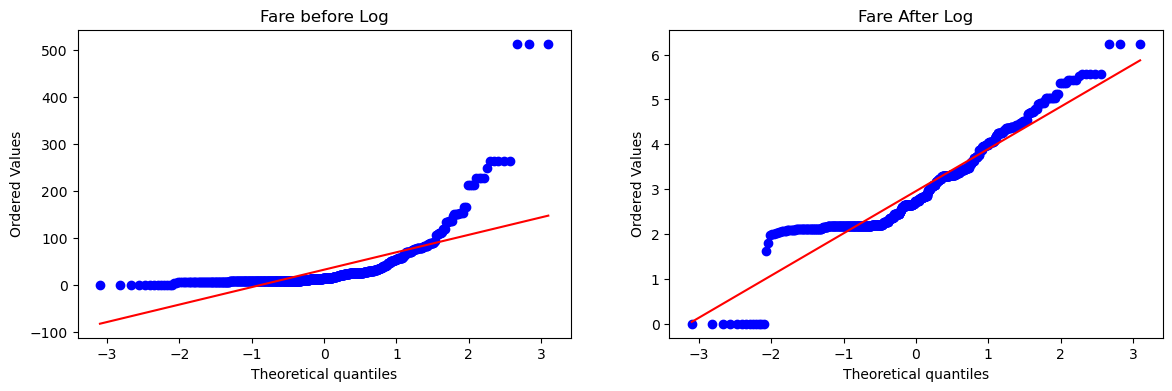

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare before Log')



plt.subplot(122)
stats.probplot(X_train_trans['Fare'],dist="norm", plot=plt)
plt.title('Fare After Log')


plt.show()

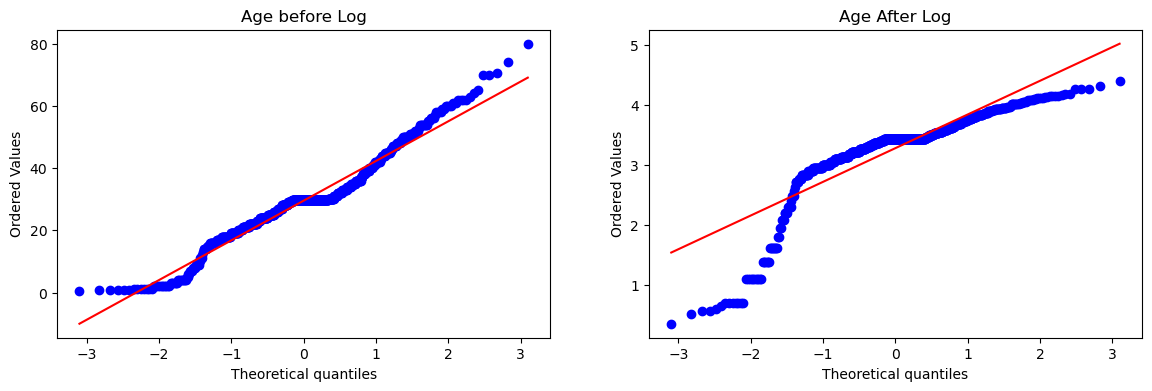

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age before Log')



plt.subplot(122)
stats.probplot(X_train_trans['Age'],dist="norm", plot=plt)
plt.title('Age After Log')


plt.show()

In [60]:
trans2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [63]:
X_train_trans2 = trans2.fit_transform(X_train)
X_test_trans2 = trans2.transform(X_test)

In [66]:
dt.fit(X_train_trans2,y_train)

DecisionTreeClassifier()

In [67]:
log.fit(X_train_trans2,y_train)

LogisticRegression()

In [68]:
y_pred_t = log.predict(X_test_trans2)
y_pred_t2 = dt.predict(X_test_trans2)

In [69]:
print("Accuracy LOG", accuracy_score(y_test,y_pred_t))
print("Accuracy DT", accuracy_score(y_test,y_pred_t2))

Accuracy LOG 0.6703910614525139
Accuracy DT 0.6703910614525139


In [70]:
X_transformed2 = trans2.fit_transform(X)

In [71]:
print(" LOG",np.mean(cross_val_score(log,X_transformed2,y,scoring='accuracy', cv=10)))
print(" DT", np.mean(cross_val_score(dt,X_transformed2,y,scoring='accuracy', cv=10)))

 LOG 0.6712609238451936
 DT 0.6633333333333333


In [79]:
def apply_trans(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trans = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'],)],remainder='passthrough')
    
    X_trans = trans.fit_transform(X)
    
    log = LogisticRegression()
    
    print("Accuracy LOG",np.mean(cross_val_score(log,X_trans,y,scoring='accuracy',cv=10)))
      
          
    plt.figure(figsize=(14,4))
          
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm", plot=plt)
    plt.title('Fare before Log')



    plt.subplot(122)
    stats.probplot(X['Fare'],dist="norm", plot=plt)
    plt.title('Fare After Log')


    plt.show()

Accuracy LOG 0.6589013732833957


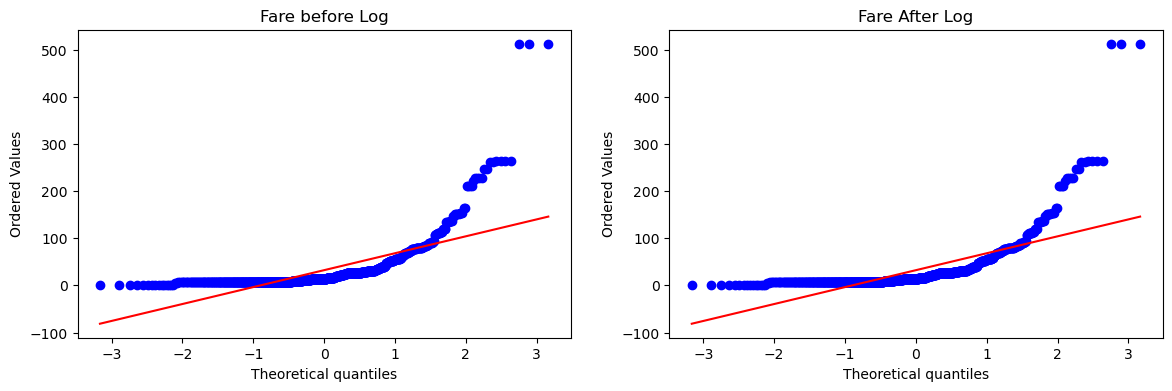

In [80]:
apply_trans(lambda x: x) 

Accuracy LOG 0.6442446941323345


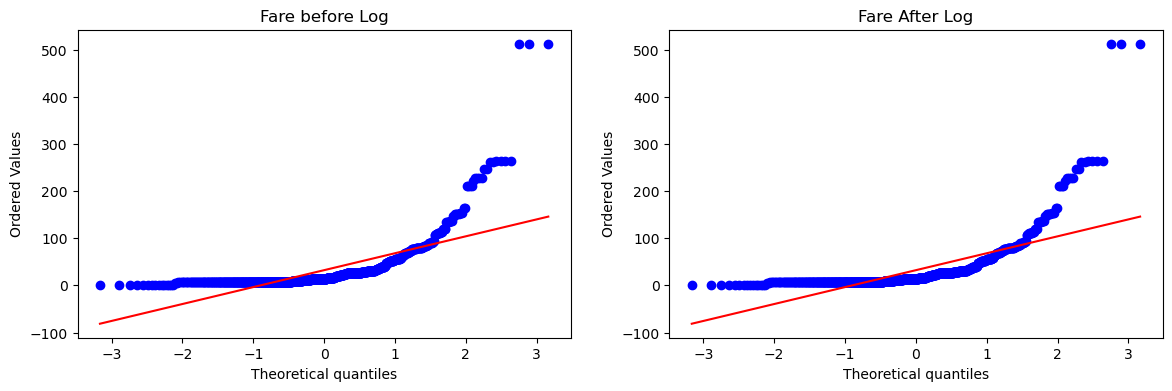

In [81]:
apply_trans(lambda x: x**2) 

Accuracy LOG 0.6589013732833957


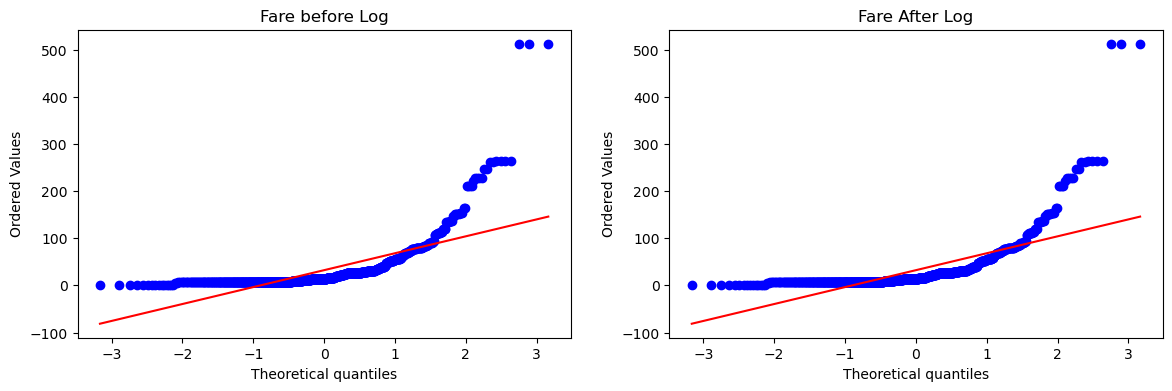

In [82]:
apply_trans(lambda x: x**1/2) 

Accuracy LOG 0.61729088639201


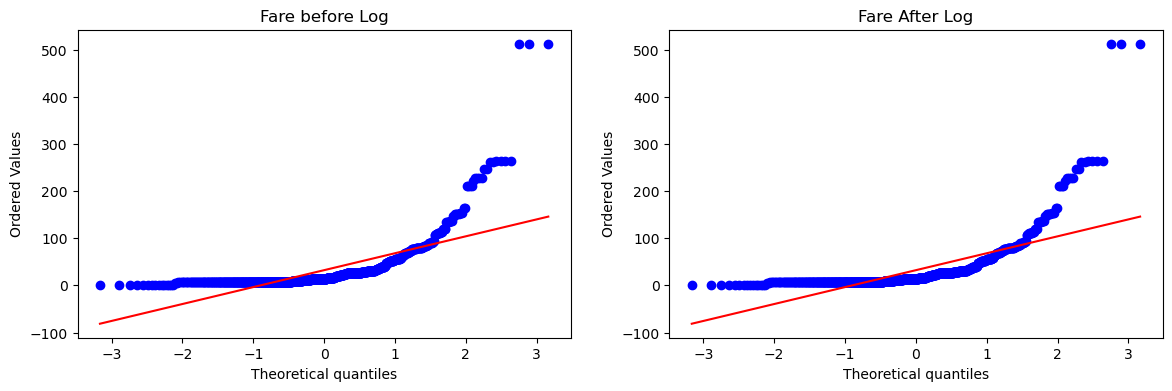

In [90]:
apply_trans(lambda x: 1/(x+0.01))

Accuracy LOG 0.6195131086142323


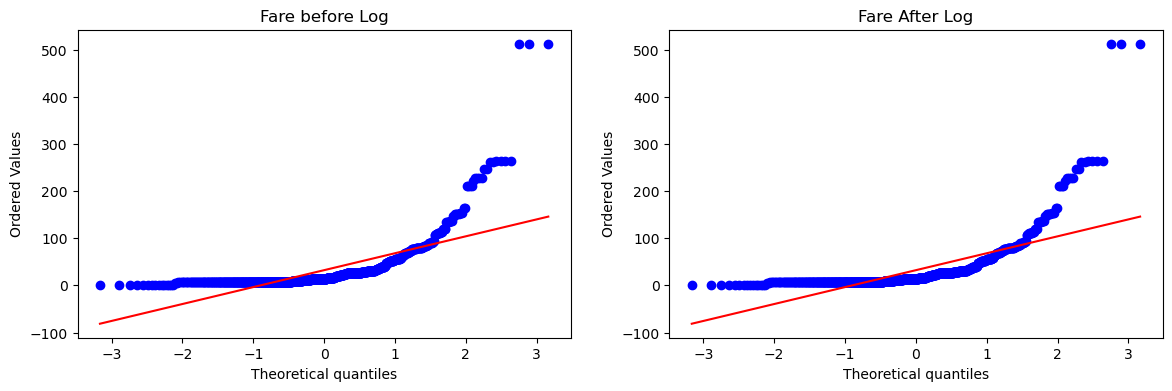

In [91]:
apply_trans(np.sin)

### Power Transform

##### Box-Cox Transform

##### Yeo-Johnson Transform

In [92]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [93]:
cf= pd.read_csv('concrete.csv')

In [94]:
cf.head()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [95]:
cf.shape

(1030, 9)

In [96]:
cf.isnull().sum()

Cement              0
Slag                0
Flyash              0
Water               0
SuperPlasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CSinMPa             0
dtype: int64

In [97]:
cf.describe()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [98]:
X = cf.drop(columns=['CSinMPa'])

In [99]:
y = cf.iloc[:,-1]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [101]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_predcem = lr.predict(X_test)

In [102]:
r2_score(y_test,y_predcem)

0.627553179231485

In [103]:
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628633

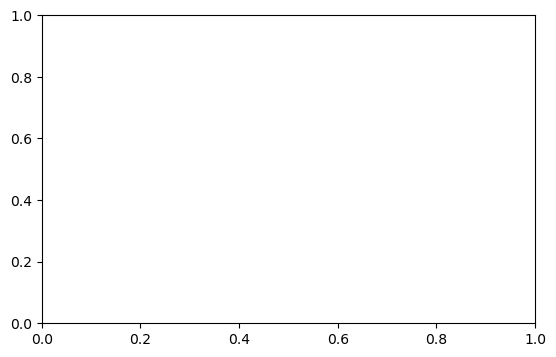

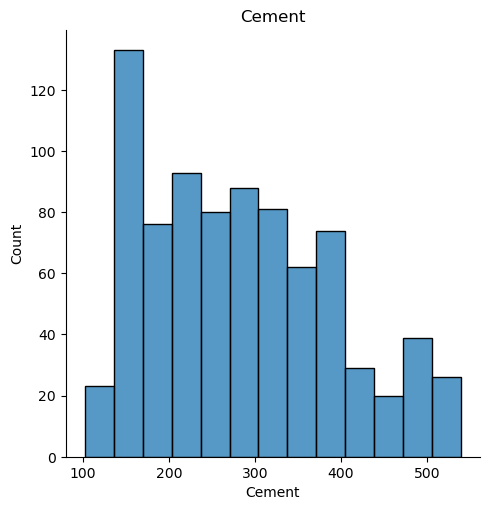

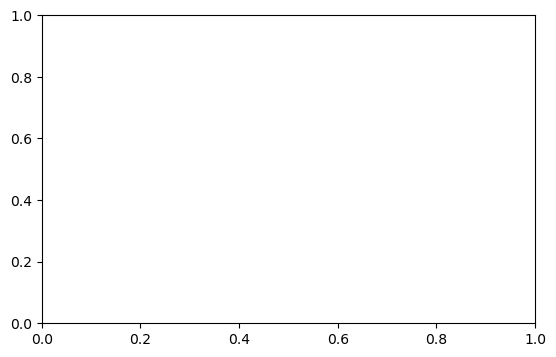

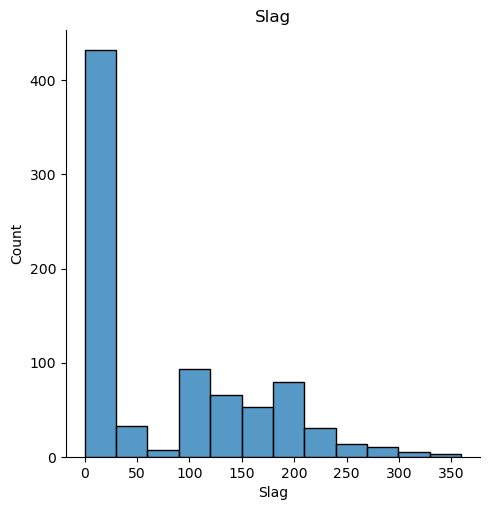

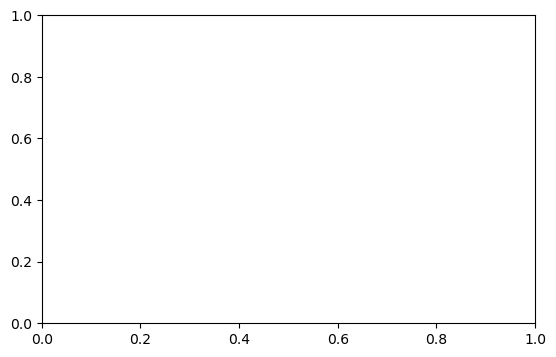

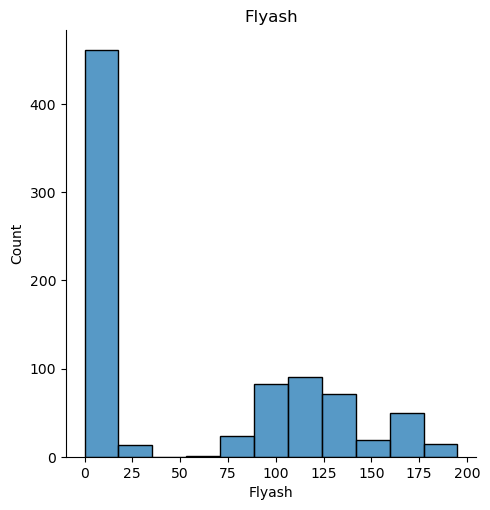

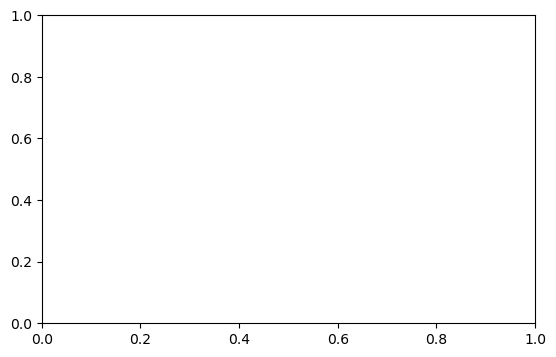

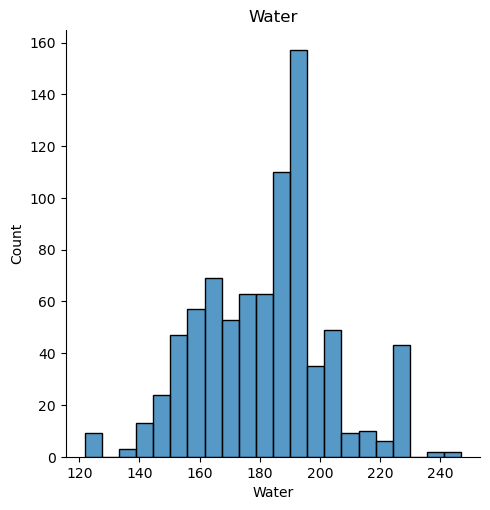

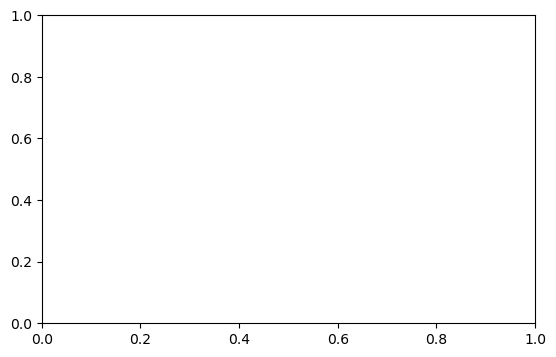

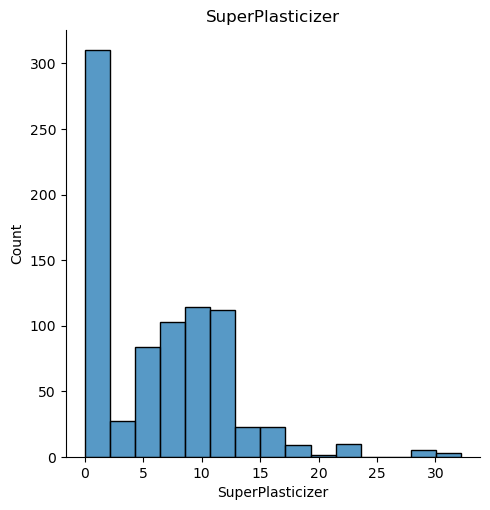

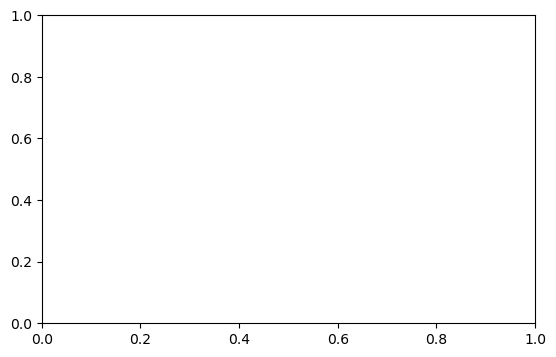

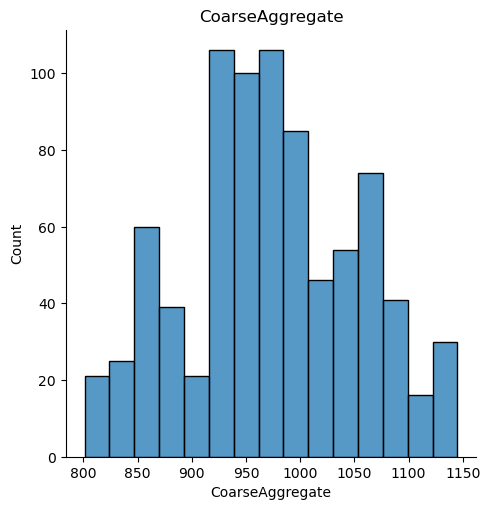

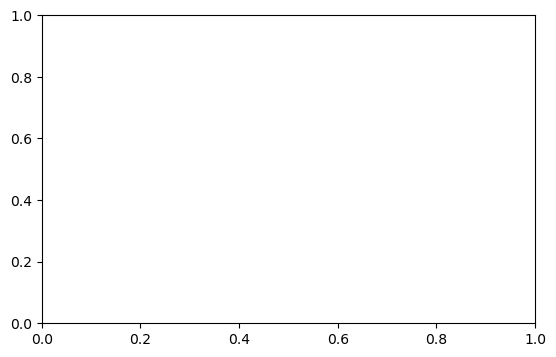

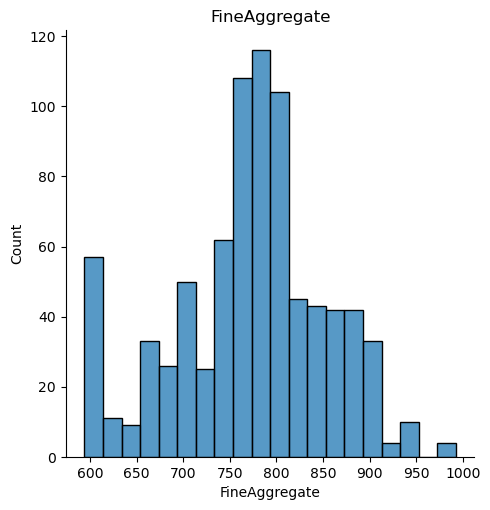

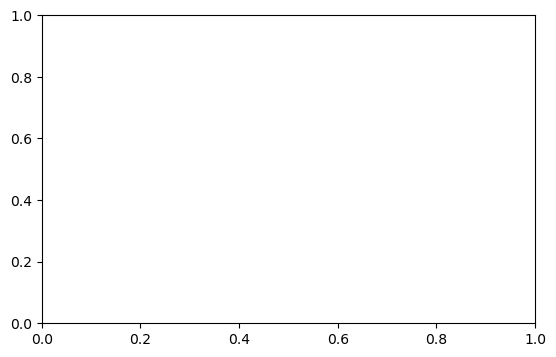

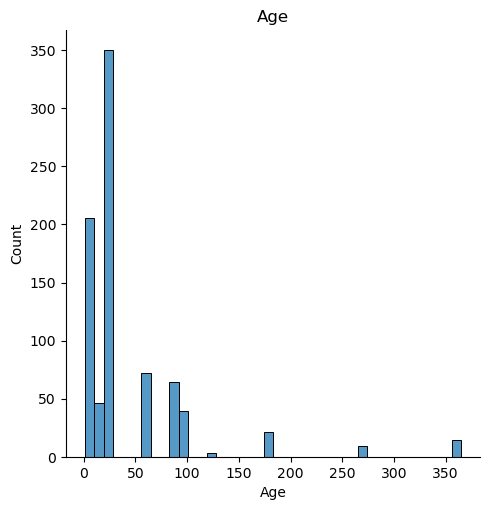

In [105]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)
  
    plt.show()

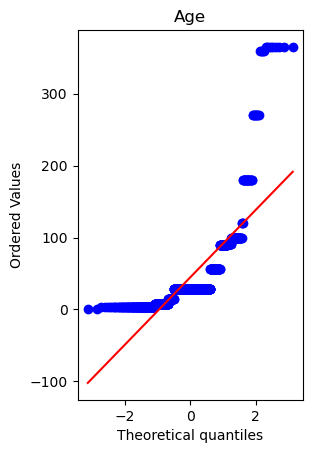

In [107]:
plt.subplot(122)
stats.probplot(X_train[col],dist="norm", plot=plt)
plt.title(col)
    
plt.show()

In [108]:
pm = PowerTransformer(method='box-cox')

In [109]:
X_train_pm= pm.fit_transform(X_train+0.000001)
X_test_pm = pm.transform(X_test+0.000001)

In [110]:
pd.DataFrame({'cols':X_train.columns, 'box-cox_lambdas':pm.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Slag,0.025093
2,Flyash,-0.038970
3,Water,0.772682
4,SuperPlasticizer,0.098811
5,CoarseAggregate,1.129813
6,FineAggregate,1.782019
7,Age,0.066631


In [111]:
lr.fit(X_train_pm,y_train)

LinearRegression()

In [112]:
y_pred_pm= lr.predict(X_test_pm)

In [113]:
r2_score(y_test,y_pred_pm)

0.8047825006181187

In [119]:
X_t_pm= pm.fit_transform(X+0.00001)

np.mean(cross_val_score(lr,X_t_pm,y,scoring='r2'))

0.6668489653763875

In [125]:
X_t_pm= pd.DataFrame(X_t_pm,columns=X_train.columns)

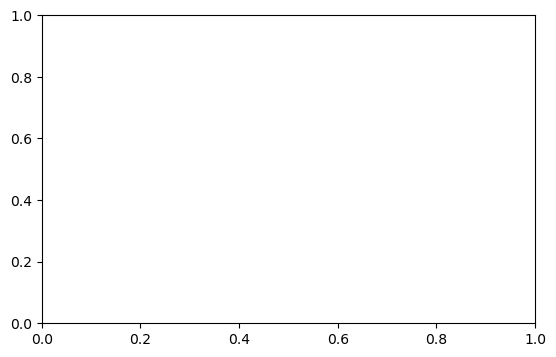

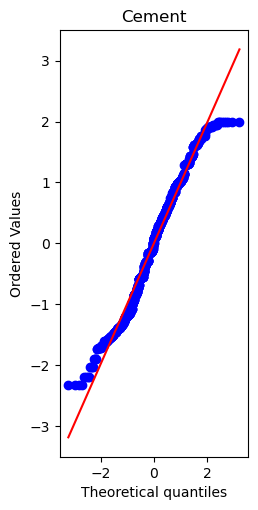

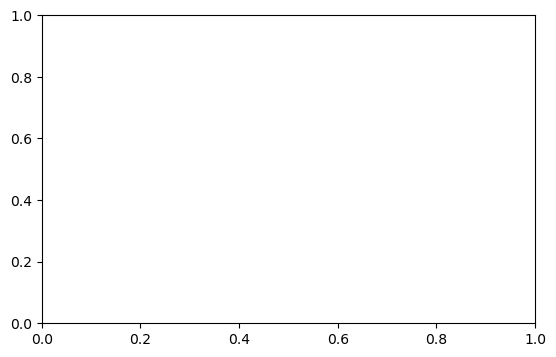

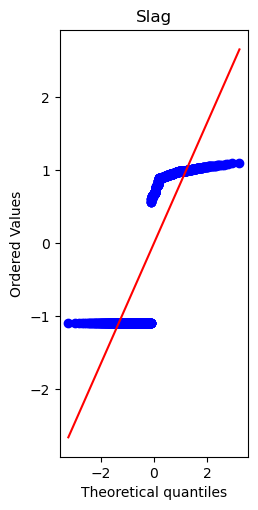

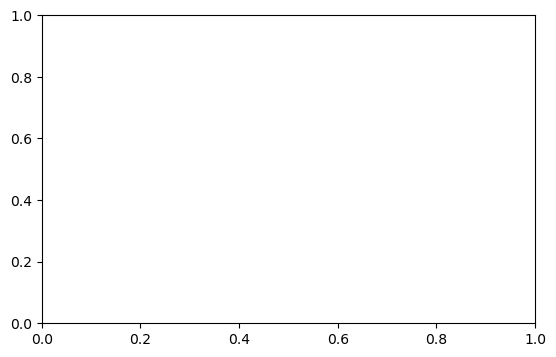

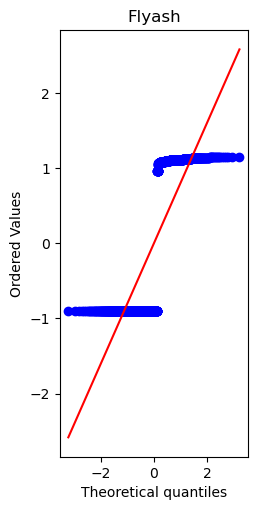

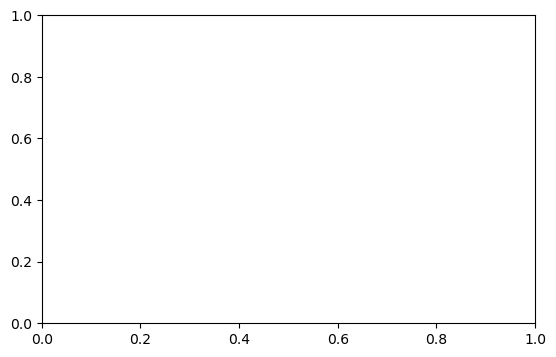

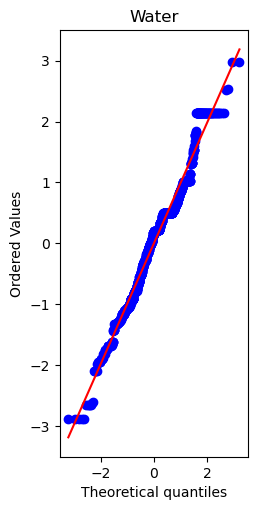

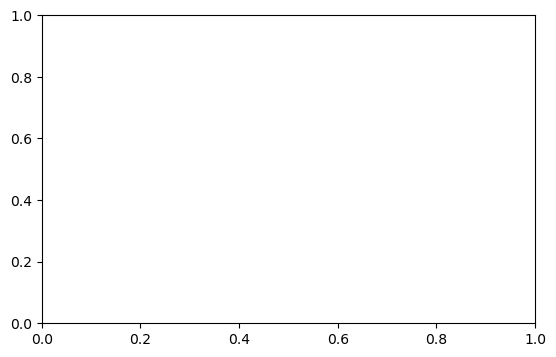

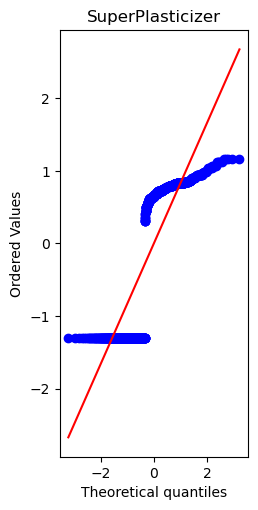

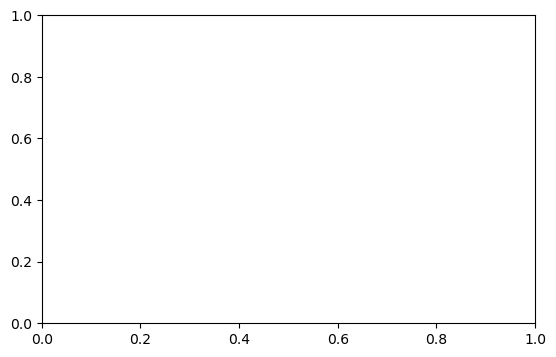

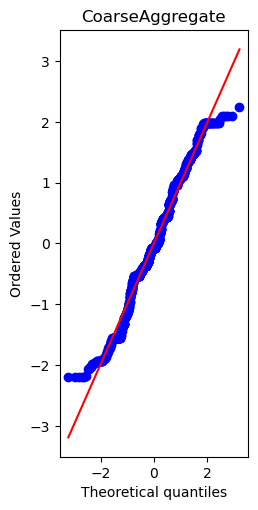

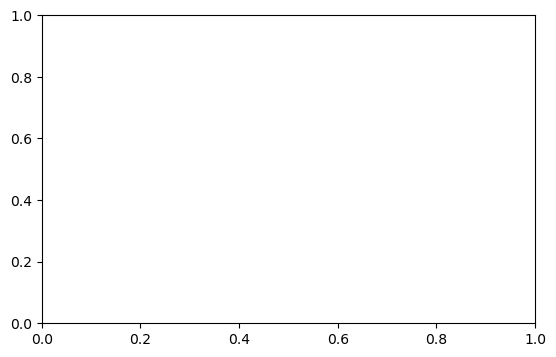

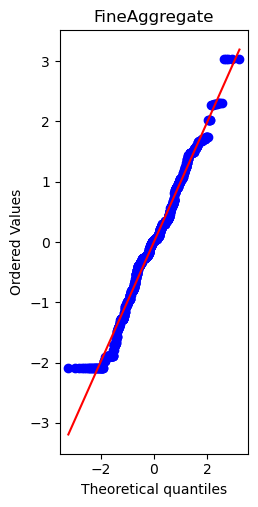

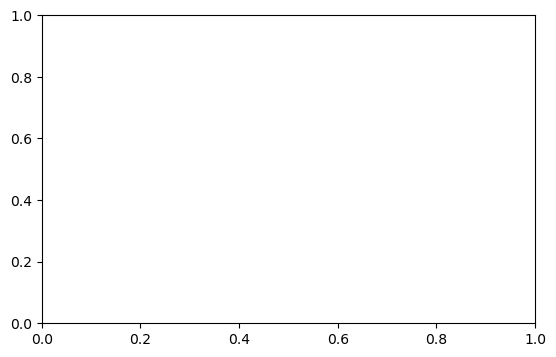

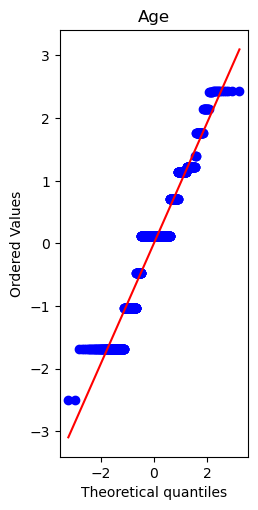

In [128]:
for col in X_t_pm.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_t_pm[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_t_pm[col],dist="norm", plot=plt)
    plt.title(col)
  
    plt.show()

In [129]:
pt1 = PowerTransformer()

In [130]:
X_train_trans2 = pt1.fit_transform(X_train)
X_test_trans2 = pt1.transform(X_test)

In [131]:
lr.fit(X_train_trans2,y_train)

LinearRegression()

In [132]:
y_pred3= lr.predict(X_test_trans2)

In [133]:
print(r2_score(y_test,y_pred3))

0.8161906513339304


In [134]:
pd.DataFrame({'cols':X_train.columns, 'Yeo-Johnson_Lambdas':pm.lambdas_})

,cols,Yeo-Johnson_Lambdas
0,Cement,0.172271
1,Slag,0.028052
2,Flyash,-0.037072
3,Water,0.809568
4,SuperPlasticizer,0.114979
5,CoarseAggregate,1.129168
6,FineAggregate,1.829625
7,Age,0.048975


In [136]:
X_transformed3 = pt1.fit_transform(X)

np.mean(cross_val_score(lr,X_transformed3,y,scoring='r2'))

0.6834625134285742

In [137]:
X_train3 = pd.DataFrame(X_train_trans2,columns=X_train.columns)

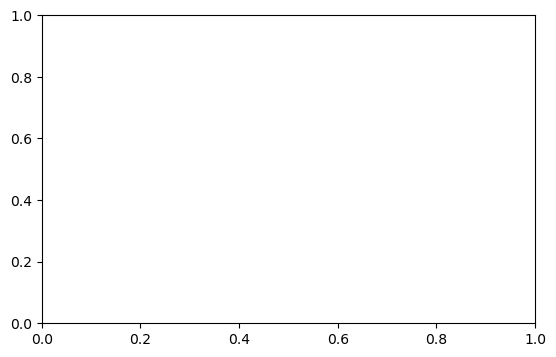

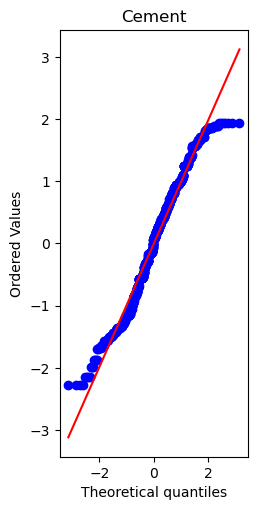

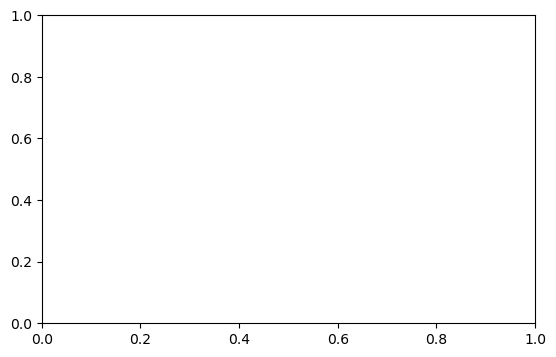

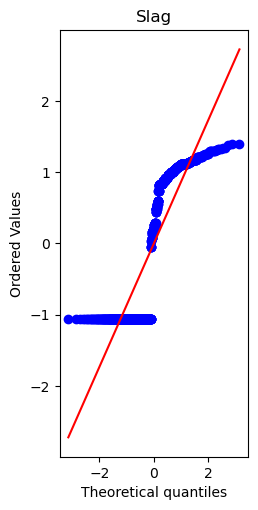

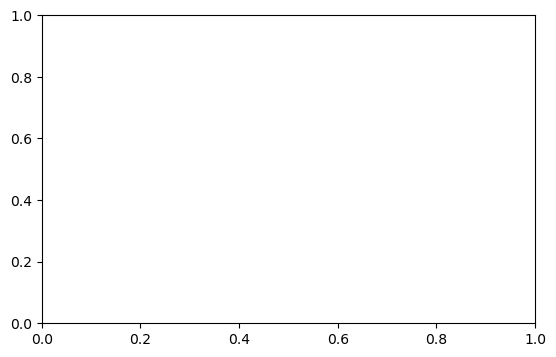

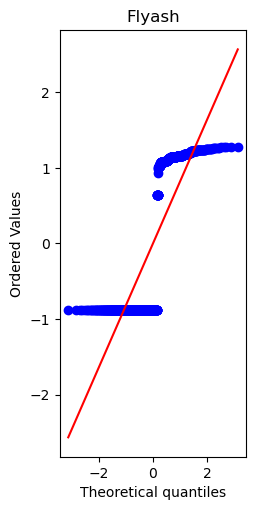

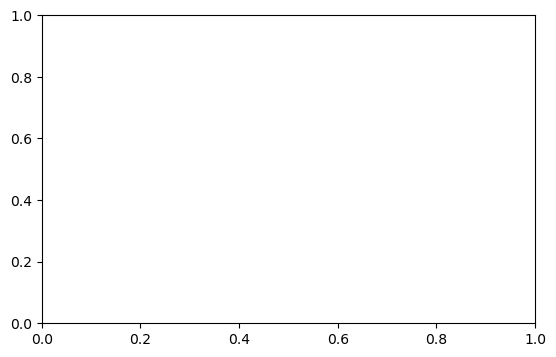

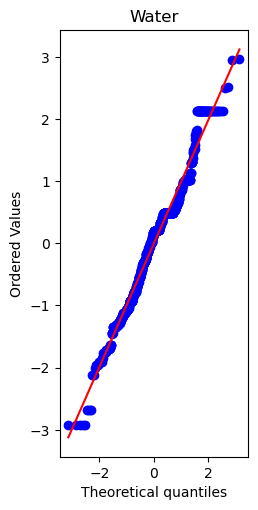

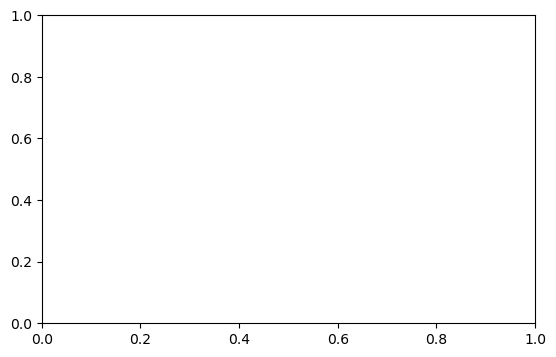

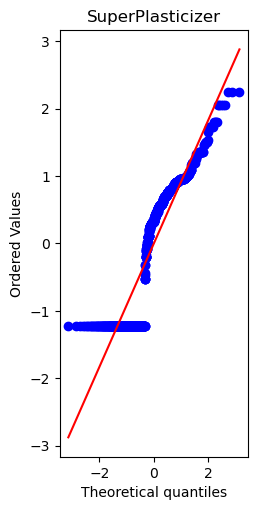

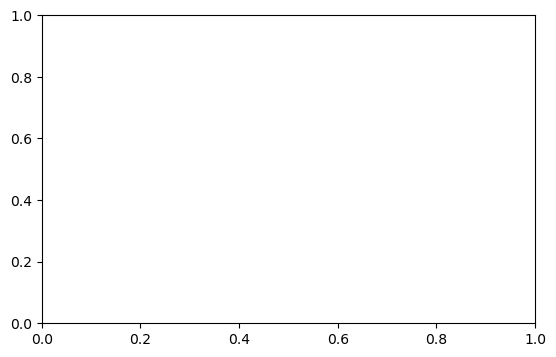

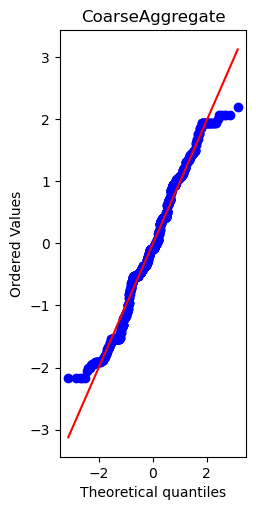

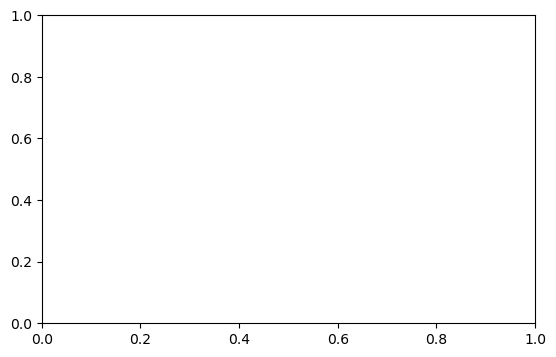

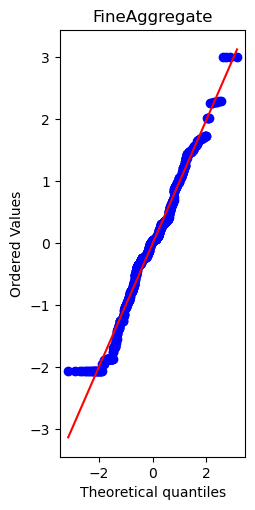

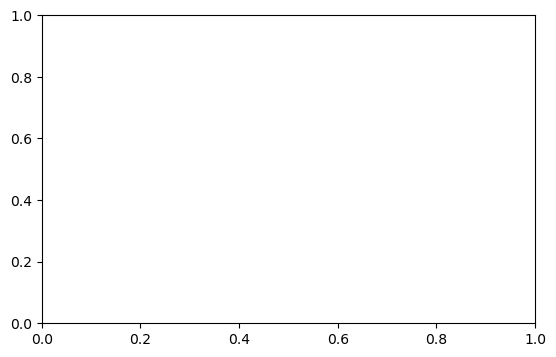

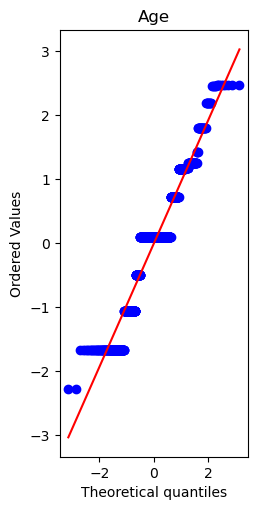

In [138]:
for col in X_train3.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train3[col],dist="norm", plot=plt)
    plt.title(col)
  
    plt.show()